In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
file_path = "../Resources.2/general_dataset.csv"
df= pd.read_csv(file_path)
df.head()

,country_code,country_name,year,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
0,AFG,Afghanistan,1971,NaN,NaN,1893554,NaN,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,2.665129,11475450,0.652
1,AFG,Afghanistan,1972,NaN,NaN,1530347,NaN,0.0,0.0,150.0,...,0.0,0.0,0.000000,0.0,0.0,2120.261216,150.0,2.714539,11791222,-1.089
2,AFG,Afghanistan,1976,NaN,NaN,1980859,NaN,0.0,0.0,51.0,...,0.0,0.0,0.000000,0.0,0.0,618.094723,51.0,1.981389,12943093,-0.295
3,AFG,Afghanistan,1978,NaN,NaN,2153300,NaN,0.0,0.0,120.0,...,0.0,0.0,0.393939,52000.0,52000.0,1979.191965,120.0,1.281715,13341199,0.105
4,AFG,Afghanistan,1980,NaN,NaN,1756302,NaN,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,224.601333,0.0,-0.407658,13356500,0.690


In [3]:
hti_df= df[(df['country_name'] == 'Haiti')]
hti_df.head()

,country_code,country_name,year,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
1922,HTI,Haiti,1972,NaN,NaN,391721,1.543642,0.0,0.0,78.0,...,0.000000,0.0,0.064449,959.0,959.0,826.958859,78.0,1.670974,4837334,0.324
1923,HTI,Haiti,1974,NaN,NaN,472091,14.504314,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,10131.894484,0.0,1.715022,5003708,-0.189
1924,HTI,Haiti,1977,NaN,NaN,704144,3.883897,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,8498.583569,0.0,1.964309,5294625,0.387
1925,HTI,Haiti,1979,NaN,NaN,749901,3.125091,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,20.108696,8.0,2.126862,5520187,0.133
1926,HTI,Haiti,1980,NaN,NaN,745071,19.263197,0.0,0.0,0.0,...,28.905911,0.0,7.226478,400000.0,400000.0,7673.223463,220.0,2.203511,5643175,0.696


In [4]:
hti_df.columns.tolist()

['country_code',
 'country_name',
 'year',
 'agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages_as_a_share_of_gdp',
 'economic_damages',
 'econo

In [5]:
hti_df= hti_df.drop(['country_name'], axis=1)
hti_df.columns.tolist()

['country_code',
 'year',
 'agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages_as_a_share_of_gdp',
 'economic_damages',
 'economic_damages_thous

In [6]:
hti_df= hti_df[(hti_df['year'] >= 1988) & (hti_df['year'] <= 2020)]

In [7]:
hti_df.set_index('year',inplace = True)
hti_df.head()

,country_code,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,deaths_from_storms,deaths_from_wildfires,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,,,,,,,,,,,,,,,
1988,HTI,2.940172e+09,31.110649,1007669,27.427622,0.0,0.0,27.0,54.0,0.0,...,3.492294,0.0,0.873073,91286.0,91286.0,12928.381178,81.0,2.085452,6758222,0.890
1989,HTI,2.901671e+09,30.592998,1023120,7.820710,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,361.409104,0.0,2.043616,6897755,0.508
1990,HTI,2.780139e+09,29.736751,994997,11.995750,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,2.011597,7037915,0.876
1992,HTI,2.668984e+09,34.120608,888522,20.908166,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,13663.068725,0.0,1.943488,7319491,0.492
1993,HTI,2.710842e+09,30.847043,684199,18.336642,0.0,0.0,13.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,67.015145,13.0,1.910631,7460684,0.409


In [8]:
hti_df = hti_df.drop([
 'country_code',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages',
 'economic_damages_thousands',
], axis=1)
hti_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1988 to 2020
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   agriculture_value_added_constants               30 non-null     float64
 1   agriculture_value_added_percentage_gdp          30 non-null     float64
 2   annual_co2_emissions_tons                       30 non-null     int64  
 3   inflation_inflation_gdp_deflation               30 non-null     float64
 4   economic_damages_as_a_share_of_gdp              30 non-null     float64
 5   people_affected_per_100k                        30 non-null     float64
 6   number_of_deaths                                30 non-null     float64
 7   population_population_growth_annual_percentage  30 non-null     float64
 8   population_population_total                     30 non-null     int64  
 9   temperature_change_temp_change_celsius  

In [9]:
hti_df.columns.tolist()

['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']

In [10]:
hti_df.corr ()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
agriculture_value_added_constants,1.000000,0.507059,-0.093286,-0.259306,-0.008574,0.014129,-0.316741,0.240571,-0.163897,-0.171410
agriculture_value_added_percentage_gdp,0.507059,1.000000,-0.630560,0.198078,0.011815,0.177447,-0.123978,0.689454,-0.674813,-0.343760
annual_co2_emissions_tons,-0.093286,-0.630560,1.000000,-0.301074,0.108885,0.045011,-0.106336,-0.938399,0.943305,0.681937
inflation_inflation_gdp_deflation,-0.259306,0.198078,-0.301074,1.000000,0.063999,0.145960,0.159594,0.248116,-0.281639,-0.040013
economic_damages_as_a_share_of_gdp,-0.008574,0.011815,0.108885,0.063999,1.000000,0.884217,0.106144,-0.080908,0.078288,0.200577
people_affected_per_100k,0.014129,0.177447,0.045011,0.145960,0.884217,1.000000,0.131632,-0.036106,0.037523,0.157611
number_of_deaths,-0.316741,-0.123978,-0.106336,0.159594,0.106144,0.131632,1.000000,0.025172,-0.037163,-0.086279
population_population_growth_annual_percentage,0.240571,0.689454,-0.938399,0.248116,-0.080908,-0.036106,0.025172,1.000000,-0.994809,-0.692178
population_population_total,-0.163897,-0.674813,0.943305,-0.281639,0.078288,0.037523,-0.037163,-0.994809,1.000000,0.671873
temperature_change_temp_change_celsius,-0.171410,-0.343760,0.681937,-0.040013,0.200577,0.157611,-0.086279,-0.692178,0.671873,1.000000


In [11]:
hti_corr_df = hti_df.corr(method='spearman')

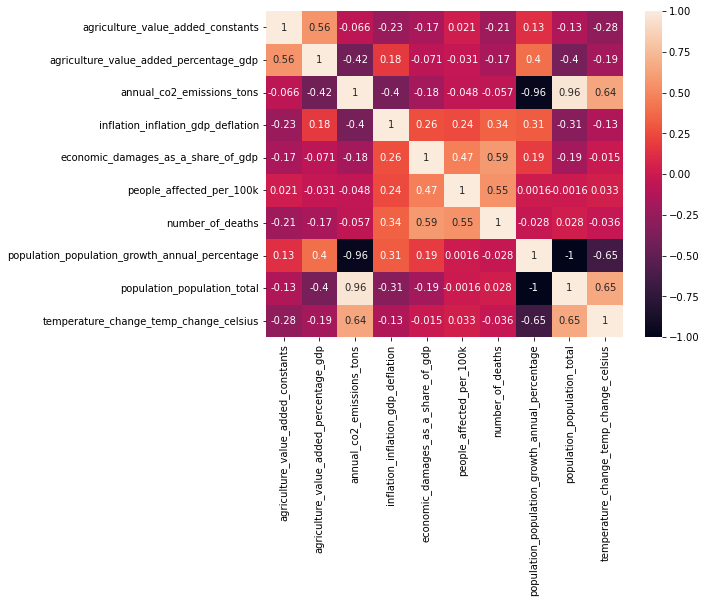

In [12]:
plt.figure(figsize=(8, 6))
sb.heatmap(hti_corr_df, annot=True)
plt.show()

### CORRELATION TESTS

El análisis gráfico hecho previamente y los test estadísticos mostraron evidencias de que no se puede asumir normalidad en las variables de desastres. Siendo estrictos, este hecho excluye la posibilidad de utilizar el coeficiente de Pearson, dejando como alternativas el de Spearman o Kendall. Sin embargo, dado que la distribución no se aleja mucho de la normalidad y de que el coeficiente de Pearson tiene cierta robustez, a fines prácticos sí que se podría utilizar siempre y cuando se tenga en cuenta este hecho y se comunique en los resultados. Otra posibilidad es tratar de transformar las variables para mejorar su distribución, por ejemplo, aplicando el logaritmo.

In [13]:
print('Correlación Pearson: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['population_population_total'], method='pearson'))
print('Correlación spearman: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['population_population_total'], method='spearman'))
print('Correlación kendall: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['population_population_total'], method='kendall'))

Correlación Pearson:  0.6718731895585782
Correlación spearman:  0.6533926585094549
Correlación kendall:  0.4666666666666667


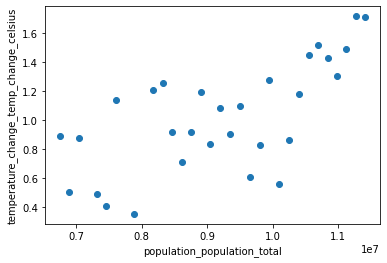

In [14]:
plt.scatter(hti_df.population_population_total , hti_df.temperature_change_temp_change_celsius )
plt.xlabel('population_population_total')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [15]:
print('Correlación Pearson: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['population_population_growth_annual_percentage'], method='pearson'))
print('Correlación spearman: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['population_population_growth_annual_percentage'], method='spearman'))
print('Correlación kendall: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['population_population_growth_annual_percentage'], method='kendall'))

Correlación Pearson:  -0.6921776009117921
Correlación spearman:  -0.6533926585094549
Correlación kendall:  -0.4666666666666667


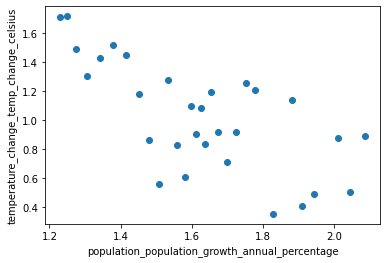

In [16]:
plt.scatter(hti_df.population_population_growth_annual_percentage, hti_df.temperature_change_temp_change_celsius )
plt.xlabel('population_population_growth_annual_percentage')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [17]:
print('Correlación Pearson: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['annual_co2_emissions_tons'], method='pearson'))
print('Correlación spearman: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['annual_co2_emissions_tons'], method='spearman'))
print('Correlación kendall: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['annual_co2_emissions_tons'], method='kendall'))

Correlación Pearson:  0.6819370931565247
Correlación spearman:  0.6449388209121245
Correlación kendall:  0.46206896551724136


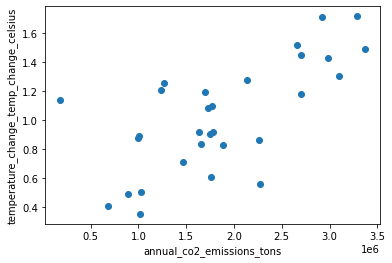

In [18]:
plt.scatter(hti_df.annual_co2_emissions_tons, hti_df.temperature_change_temp_change_celsius )
plt.xlabel('annual_co2_emissions_tons')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [19]:
print('Correlación Pearson: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.20057688940492782
Correlación spearman:  -0.015192907767686293
Correlación kendall:  0.005901785264970925


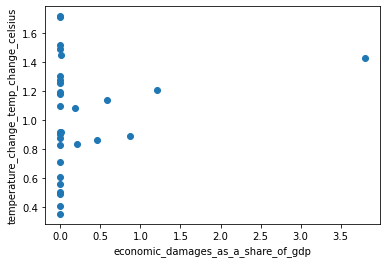

In [20]:
plt.scatter(hti_df.economic_damages_as_a_share_of_gdp, hti_df.temperature_change_temp_change_celsius )
plt.xlabel('economic_damages_as_a_share_of_gdp')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [21]:
# Correlación sin outlier
#r, p = stats.pearsonr(np.delete(a, 5), np.delete(b, 5))
#print(f"Correlación Pearson sin outlier: r={r}, p-value={p}")

In [22]:
print('Correlación Pearson: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['number_of_deaths'], method='pearson'))
print('Correlación spearman: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['number_of_deaths'], method='spearman'))
print('Correlación kendall: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['number_of_deaths'], method='kendall'))

Correlación Pearson:  -0.0862789276343365
Correlación spearman:  -0.03565464589691843
Correlación kendall:  -0.023284796312594613


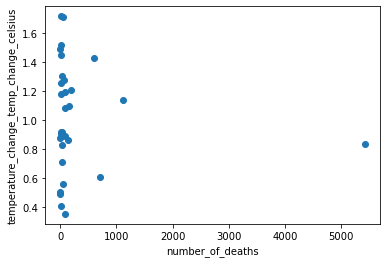

In [23]:
plt.scatter(hti_df.number_of_deaths, hti_df.temperature_change_temp_change_celsius )
plt.xlabel('number_of_deaths')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [24]:
# Correlación sin outlier
#Pendiente


In [25]:
print('Correlación Pearson: ', hti_df['number_of_deaths'].corr(hti_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', hti_df['number_of_deaths'].corr(hti_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', hti_df['number_of_deaths'].corr(hti_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.10614412546931169
Correlación spearman:  0.5855184546725992
Correlación kendall:  0.4722502486105752


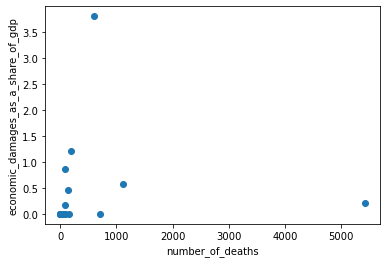

In [26]:
plt.scatter(hti_df.number_of_deaths, hti_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('number_of_deaths')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [27]:
# Correlación sin outlier
#Pendiente


In [28]:
print('Correlación Pearson: ', hti_df['people_affected_per_100k'].corr(hti_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', hti_df['people_affected_per_100k'].corr(hti_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', hti_df['people_affected_per_100k'].corr(hti_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.884216627791326
Correlación spearman:  0.4653213127531058
Correlación kendall:  0.3761613034367152


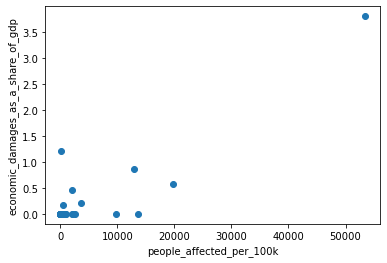

In [29]:
plt.scatter(hti_df.people_affected_per_100k, hti_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('people_affected_per_100k')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [30]:
# Correlación sin outlier
#Pendiente


In [31]:
print('Correlación Pearson: ', hti_df['economic_damages_as_a_share_of_gdp'].corr(hti_df['inflation_inflation_gdp_deflation'], method='pearson'))
print('Correlación spearman: ', hti_df['economic_damages_as_a_share_of_gdp'].corr(hti_df['inflation_inflation_gdp_deflation'], method='spearman'))
print('Correlación kendall: ', hti_df['economic_damages_as_a_share_of_gdp'].corr(hti_df['inflation_inflation_gdp_deflation'], method='kendall'))

Correlación Pearson:  0.0639991268134139
Correlación spearman:  0.2593094596959339
Correlación kendall:  0.20066069900901146


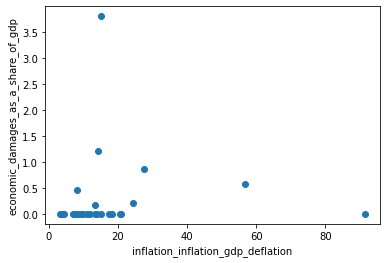

In [32]:
plt.scatter(hti_df.inflation_inflation_gdp_deflation, hti_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('inflation_inflation_gdp_deflation')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [33]:
print('Correlación Pearson: ', hti_df['inflation_inflation_gdp_deflation'].corr(hti_df['agriculture_value_added_constants'], method='pearson'))
print('Correlación spearman: ', hti_df['inflation_inflation_gdp_deflation'].corr(hti_df['agriculture_value_added_constants'], method='spearman'))
print('Correlación kendall: ', hti_df['inflation_inflation_gdp_deflation'].corr(hti_df['agriculture_value_added_constants'], method='kendall'))

Correlación Pearson:  -0.25930585569913495
Correlación spearman:  -0.2266963292547275
Correlación kendall:  -0.18160919540229886


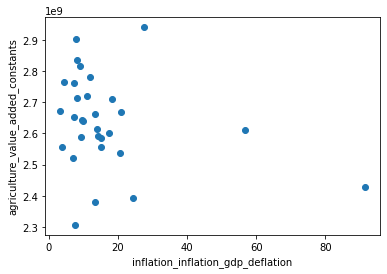

In [34]:
plt.scatter(hti_df.inflation_inflation_gdp_deflation, hti_df.agriculture_value_added_constants)
plt.xlabel('inflation_inflation_gdp_deflation')
plt.ylabel('agriculture_value_added_constants')
plt.show()

In [35]:
# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(hti_df['temperature_change_temp_change_celsius'], hti_df['population_population_total'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(hti_df['temperature_change_temp_change_celsius'], hti_df['population_population_total'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(hti_df['temperature_change_temp_change_celsius'], hti_df['population_population_total'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.6718731895585783, p-value=4.791259224139812e-05
Correlación Spearman: r=0.6533926585094549, p-value=9.048411497828581e-05
Correlación Pearson: r=0.4666666666666667, p-value=0.00019297391032914847


## Normalizando 

In [36]:
normalized_ND_2 = hti_df['number_of_deaths']/np.linalg.norm(hti_df['number_of_deaths'])


In [37]:
hti_df = hti_df.assign(normalized_ND_2=normalized_ND_2)

In [38]:
hti_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2
year,,,,,,,,,,,
1988,2.940172e+09,31.110649,1007669,27.427622,0.873073,12928.381178,81.0,2.085452,6758222,0.890,0.014404
1989,2.901671e+09,30.592998,1023120,7.820710,0.000000,361.409104,0.0,2.043616,6897755,0.508,0.000000
1990,2.780139e+09,29.736751,994997,11.995750,0.000000,0.000000,0.0,2.011597,7037915,0.876,0.000000
1992,2.668984e+09,34.120608,888522,20.908166,0.000000,13663.068725,0.0,1.943488,7319491,0.492,0.000000
1993,2.710842e+09,30.847043,684199,18.336642,0.000000,67.015145,13.0,1.910631,7460684,0.409,0.002312


In [39]:
print('Correlación Pearson: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['normalized_ND_2'], method='pearson'))
print('Correlación spearman: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['normalized_ND_2'], method='spearman'))
print('Correlación kendall: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['normalized_ND_2'], method='kendall'))

Correlación Pearson:  -0.08627892763433652
Correlación spearman:  -0.03565464589691843
Correlación kendall:  -0.023284796312594613


In [40]:
normalized_EDPGDP = hti_df['economic_damages_as_a_share_of_gdp']/np.linalg.norm(hti_df['economic_damages_as_a_share_of_gdp'])
print(normalized_EDPGDP)

year
1988    0.209982
1989    0.000000
1990    0.000000
1992    0.000000
1993    0.000000
1994    0.138698
1996    0.000207
1998    0.290633
1999    0.000000
2000    0.000000
2001    0.000019
2002    0.000985
2003    0.000000
2004    0.051062
2005    0.043070
2006    0.000000
2007    0.000000
2008    0.000000
2009    0.000000
2010    0.000000
2011    0.000000
2012    0.111404
2013    0.000000
2014    0.000813
2015    0.000000
2016    0.913963
2017    0.000000
2018    0.000000
2019    0.000000
2020    0.000000
Name: economic_damages_as_a_share_of_gdp, dtype: float64


In [41]:
hti_df = hti_df.assign(normalized_EDPGDP=normalized_EDPGDP)

In [42]:
hti_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2,normalized_EDPGDP
year,,,,,,,,,,,,
1988,2.940172e+09,31.110649,1007669,27.427622,0.873073,12928.381178,81.0,2.085452,6758222,0.890,0.014404,0.209982
1989,2.901671e+09,30.592998,1023120,7.820710,0.000000,361.409104,0.0,2.043616,6897755,0.508,0.000000,0.000000
1990,2.780139e+09,29.736751,994997,11.995750,0.000000,0.000000,0.0,2.011597,7037915,0.876,0.000000,0.000000
1992,2.668984e+09,34.120608,888522,20.908166,0.000000,13663.068725,0.0,1.943488,7319491,0.492,0.000000,0.000000
1993,2.710842e+09,30.847043,684199,18.336642,0.000000,67.015145,13.0,1.910631,7460684,0.409,0.002312,0.000000


Pairplot() function from the Seaborn library will output a figure containing histogram and scatter plot between each variable.

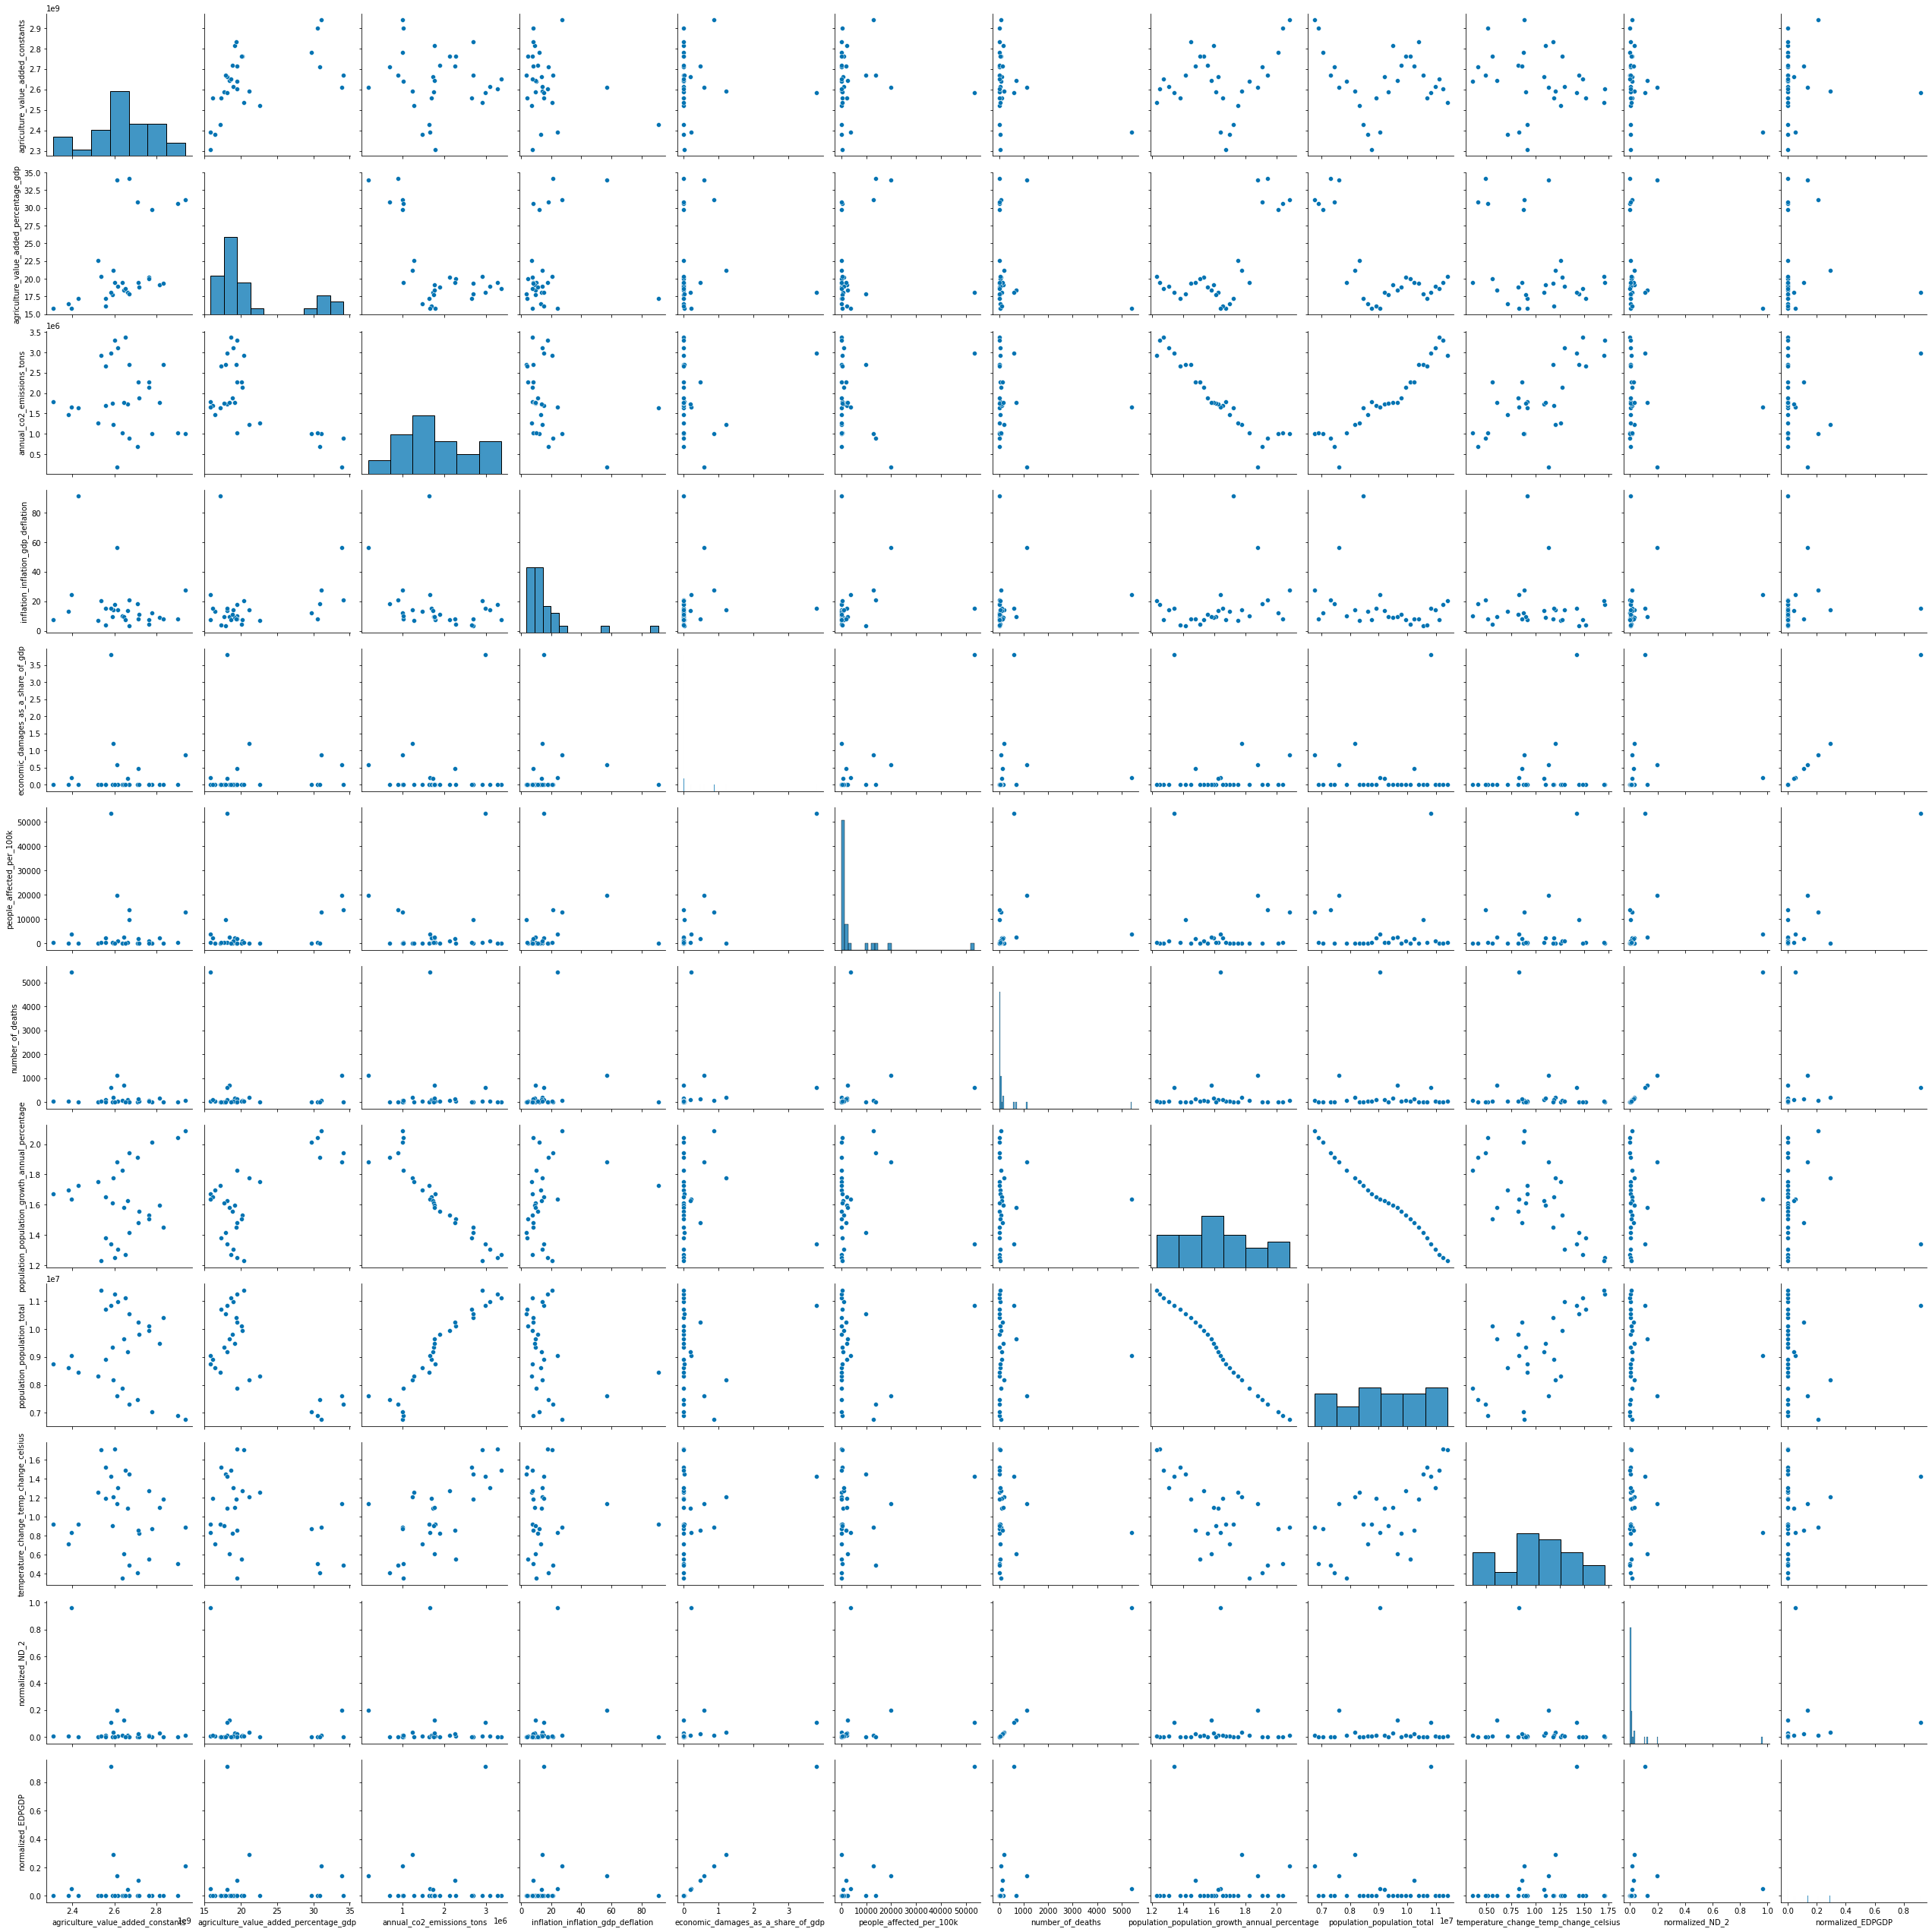

In [43]:
# Visualize the data using scatter plot and histogram
sb.set_palette('colorblind')
sb.pairplot(data=hti_df, height=3)

In [44]:
# Set independent and dependent variables
X = hti_df[['population_population_total','temperature_change_temp_change_celsius','annual_co2_emissions_tons']]
y = hti_df['normalized_EDPGDP']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

y_pred = regr.predict(X)
print(y_pred.shape)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

(30,)
Intercept: 0.18698427240806934
Coefficients: [-3.59541545e-08  1.17541574e-01  4.42675029e-08]


In [45]:
X = hti_df[['population_population_total','temperature_change_temp_change_celsius','annual_co2_emissions_tons']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(hti_df['normalized_EDPGDP'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:      normalized_EDPGDP   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                 -0.059
Method:                 Least Squares   F-statistic:                    0.4622
Date:                Thu, 25 Aug 2022   Prob (F-statistic):              0.711
Time:                        18:58:05   Log-Likelihood:                 10.866
No. Observations:                  30   AIC:                            -13.73
Df Residuals:                      26   BIC:                            -8.126
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [46]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.05063212197525757


In [47]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 0.4622146313803653
Probability of observing value at least as high as F-statistic: 0.7110782054618319


Because our f_pvalue is lower than 0.05 we can conclude that our model performs better than other simpler model.

In [48]:
print(olsmod.pvalues)

const                                     0.685569
population_population_total               0.624767
temperature_change_temp_change_celsius    0.347946
annual_co2_emissions_tons                 0.725865
dtype: float64


Both of our independent variables,  have p-value mayor than 0.05 which shows that there is not sufficient evidence that dichas variables affects our pie sales.

In [49]:
# Set independent and dependent variables
X = hti_df[['normalized_EDPGDP']]
y = hti_df['inflation_inflation_gdp_deflation']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 15.911897023649827
Coefficients: [6.32357453]


In [50]:
X = hti_df[['normalized_EDPGDP']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(hti_df['inflation_inflation_gdp_deflation'], X).fit()
print(olsmod.summary())

                                    OLS Regression Results                                   
Dep. Variable:     inflation_inflation_gdp_deflation   R-squared:                       0.004
Model:                                           OLS   Adj. R-squared:                 -0.031
Method:                                Least Squares   F-statistic:                    0.1152
Date:                               Thu, 25 Aug 2022   Prob (F-statistic):              0.737
Time:                                       18:58:05   Log-Likelihood:                -127.65
No. Observations:                                 30   AIC:                             259.3
Df Residuals:                                     28   BIC:                             262.1
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                        coef    std err          t      P>|t

In [51]:
print(olsmod.pvalues)

const                0.000067
normalized_EDPGDP    0.736880
dtype: float64


## Encoding

In [52]:
hti_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2,normalized_EDPGDP
year,,,,,,,,,,,,
1988,2.940172e+09,31.110649,1007669,27.427622,0.873073,12928.381178,81.0,2.085452,6758222,0.890,0.014404,0.209982
1989,2.901671e+09,30.592998,1023120,7.820710,0.000000,361.409104,0.0,2.043616,6897755,0.508,0.000000,0.000000
1990,2.780139e+09,29.736751,994997,11.995750,0.000000,0.000000,0.0,2.011597,7037915,0.876,0.000000,0.000000
1992,2.668984e+09,34.120608,888522,20.908166,0.000000,13663.068725,0.0,1.943488,7319491,0.492,0.000000,0.000000
1993,2.710842e+09,30.847043,684199,18.336642,0.000000,67.015145,13.0,1.910631,7460684,0.409,0.002312,0.000000


In [53]:
hti_df = hti_df.drop(['normalized_ND_2','normalized_EDPGDP'],axis=1)
hti_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,,,,
1988,2.940172e+09,31.110649,1007669,27.427622,0.873073,12928.381178,81.0,2.085452,6758222,0.890
1989,2.901671e+09,30.592998,1023120,7.820710,0.000000,361.409104,0.0,2.043616,6897755,0.508
1990,2.780139e+09,29.736751,994997,11.995750,0.000000,0.000000,0.0,2.011597,7037915,0.876
1992,2.668984e+09,34.120608,888522,20.908166,0.000000,13663.068725,0.0,1.943488,7319491,0.492
1993,2.710842e+09,30.847043,684199,18.336642,0.000000,67.015145,13.0,1.910631,7460684,0.409


In [54]:
from sklearn.preprocessing import StandardScaler
 
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(hti_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
 'agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius',
])
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
0,2.081096,1.796427,-1.051144,0.652415,0.875091,0.844849,-0.224195,1.949538,-1.776146,-0.362913
1,1.815419,1.702355,-1.032130,-0.495395,-0.339506,-0.374431,-0.306714,1.772296,-1.675020,-1.395688
2,0.976782,1.546750,-1.066737,-0.250984,-0.339506,-0.409495,-0.306714,1.636642,-1.573440,-0.400764
3,0.209755,2.343424,-1.197762,0.270759,-0.339506,0.916130,-0.306714,1.348092,-1.369369,-1.438946
4,0.498600,1.748522,-1.449195,0.120219,-0.339506,-0.402993,-0.293470,1.208889,-1.267041,-1.663345


How make the split and train in the model?

In [55]:
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k','temperature_change_temp_change_celsius', 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

y_pred = regr.predict(X)
print(y_pred.shape)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

(30,)
Intercept: -6.456921351929986e-17
Coefficients: [ 0.87486403  0.06237544 -0.00363461]


## Model Validation

In [69]:
X = df_scaled[['people_affected_per_100k','temperature_change_temp_change_celsius', 'number_of_deaths']]
X = sm.add_constant(X) # adding a constant

olsmod_scaled = sm.OLS(df_scaled['economic_damages_as_a_share_of_gdp'], X).fit()
print(olsmod_scaled.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.786
Model:                                            OLS   Adj. R-squared:                  0.761
Method:                                 Least Squares   F-statistic:                     31.77
Date:                                Thu, 25 Aug 2022   Prob (F-statistic):           7.53e-09
Time:                                        19:00:43   Log-Likelihood:                -19.463
No. Observations:                                  30   AIC:                             46.93
Df Residuals:                                      26   BIC:                             52.53
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
                                             coef 

In [70]:
print('R2 score:', olsmod_scaled.rsquared)

R2 score: 0.7856945997518076


In [71]:
print('F-statistic:', olsmod_scaled.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod_scaled.f_pvalue)

F-statistic: 31.774062575944974
Probability of observing value at least as high as F-statistic: 7.531346911712075e-09


In [72]:
print(olsmod_scaled.pvalues)

const                                     1.000000e+00
people_affected_per_100k                  7.379598e-10
temperature_change_temp_change_celsius    5.060170e-01
number_of_deaths                          9.688349e-01
dtype: float64


In [75]:
#df_scaled['economic_damages_as_a_share_of_gdp_pred'] = olsmod.predict(X)

In [74]:

df_scaled['residual'] = olsmod.resid
df_scaled.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,residual
0,2.081096,1.796427,-1.051144,0.652415,0.875091,0.844849,-0.224195,1.949538,-1.776146,-0.362913,NaN
1,1.815419,1.702355,-1.032130,-0.495395,-0.339506,-0.374431,-0.306714,1.772296,-1.675020,-1.395688,NaN
2,0.976782,1.546750,-1.066737,-0.250984,-0.339506,-0.409495,-0.306714,1.636642,-1.573440,-0.400764,NaN
3,0.209755,2.343424,-1.197762,0.270759,-0.339506,0.916130,-0.306714,1.348092,-1.369369,-1.438946,NaN
4,0.498600,1.748522,-1.449195,0.120219,-0.339506,-0.402993,-0.293470,1.208889,-1.267041,-1.663345,NaN
